# AI TASK

First few things that you can tell just by looking at the problem is that it involves finding the similarity between sentences. If we can find the simliraity between input senstence with every other sentence in the DATA file.

---


In [1]:
# Importing data from Github
!npx degit hamad2810/AI-Task//blob/master/al -f

npx: installed 1 in 2.254s
> destination directory is not empty. Using --force, continuing
> cloned hamad2810/AI-Task#master


In [2]:
import pandas as pd
df = pd.read_excel('SORs.xlsx')
df.head()

,Observation Details
0,Face and eye protection equipment shall be kep...
1,Containers shall be provided for the collectio...
2,"""Application."" Protective equipment, including..."
3,"""Application."" Protective equipment, including..."
4,Employees shall be provided with eye and face ...


In [3]:
#X ="Face and eye protection equipment shall be kept clean and in good repair".lower()
X = input("Enter input string: ").lower()

In [4]:
dataList = df['Observation Details'].to_list()
print(len(dataList))

del df
#dataList = list(set(dataList))

201


## Cosine Similarity:
Finding cosine similarity of input sentence with every sentence in our "Obersvations Details.xlsx" file. Output sentences with maximum value of similarity coefficient.





In [ ]:
# Program to measure the similarity between  
# two sentences using cosine similarity.
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
def SimilarityBetweenTwoSentences(X, Y):
  # X & Y are two input sentences
  # This function will find the cosine similarity between these two sentences

  # tokenization 
  X_list = word_tokenize(X)  
  Y_list = word_tokenize(Y)
  #print("After tokenization: ", X_list)
  # stopwords = sw contains the list of stopwords 
  sw = stopwords.words('english')  + [",", "."]
  l1 =[];l2 =[] 
    
  # remove stop words from the string 
  X_set = {w for w in X_list if not w in sw}  
  Y_set = {w for w in Y_list if not w in sw} 
  #print("After removing stopwords: ", X_set)

  # form a set containing keywords of both strings  
  rvector = X_set.union(Y_set)
  # print("Check: ", check)
  # print("set containing keywords of both strings", rvector)
  for w in rvector: 
      if w in X_set: l1.append(1) # create a vector 
      else: l1.append(0)

      if w in Y_set: l2.append(1) 
      else: l2.append(0) 
  
  c = 0

  # cosine formula  
  for i in range(len(rvector)): 
          c+= l1[i]*l2[i] 
  #print("Dot Product: ", c)
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

def ifSubset(list1, subset):
  return  all(item in list1 for item in subset)


In [ ]:
max = -100
output = "NONE"

max1 = -100
output1 = "NONE"

max2 = -100
output2 = "NONE"

for sentence in dataList:
  similarity = SimilarityBetweenTwoSentences(X, sentence.lower())
  
  if similarity > max:
    max = similarity
    output = sentence
  
  elif similarity > max1 and (sentence != output) and (sentence != output1):
    max1 = similarity
    output1 = sentence
  
  elif similarity > max2 and (sentence != output) and (sentence != output1) and (sentence != output2):
    max2 = similarity
    output2 = sentence

In [ ]:
print("Input sentence: ", X)
print("")
print("Sentence1: ", output)
print("Similarity Coefficent: ", max)
print("")
print("Sentence2: ", output1)
print("Similarity Coefficent: ", max1)
print("")
print("Sentence3: ", output2)
print("Similarity Coefficent: ", max2)

## Modified Cosine Similarity Algorithm:
**"How much of input sentence is in DataFile matching observation."**

In [ ]:
def ModifiedSimilarity(X, Y):
  # X & Y are two input sentences
  # This function will find the cosine similarity between these two sentences

  # tokenization 
  X_list = word_tokenize(X)  
  Y_list = word_tokenize(Y)
  
  # stopwords = sw contains the list of stopwords 
  sw = stopwords.words('english')  + [",", "."]
  l1 =[];l2 =[] 
    
  # remove stop words from the string 
  X_set = {w for w in X_list if not w in sw}  
  Y_set = {w for w in Y_list if not w in sw} 
  
  # form a set containing keywords of both strings  
  for w in X_set: 
      if w in X_set: l1.append(1) # create a vector 
      else: l1.append(0)

      if w in Y_set: l2.append(1) 
      else: l2.append(0) 
  
  c = 0
  
  if sum(l2) == 0:
    cosine = 0
  else:
    # cosine formula  
    for i in range(len(X_set)):
          c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

In [ ]:
max = -100
output = "NONE"

max1 = -100
output1 = "NONE"

max2 = -100
output2 = "NONE"

for sentence in dataList:
  similarity = SimilarityBetweenTwoSentences(X, sentence.lower())
  
  if similarity > max:
    max = similarity
    output = sentence
  
  elif similarity > max1 and (sentence != output) and (sentence != output1):
    max1 = similarity
    output1 = sentence
  
  elif similarity > max2 and (sentence != output) and (sentence != output1) and (sentence != output2):
    max2 = similarity
    output2 = sentence

In [ ]:
print("Input sentence: ", X)
print("")
print("Sentence1: ", output)
print("Similarity Coefficent: ", max)
print("")
print("Sentence2: ", output1)
print("Similarity Coefficent: ", max1)
print("")
print("Sentence3: ", output2)
print("Similarity Coefficent: ", max2)

## Word Embeddings

### 1. Word2Vec




In [ ]:
from gensim.models import Word2Vec
import numpy as np


In [ ]:

model = Word2Vec(sentences= dataList, size=50, min_count=1, sg=1)

def vectorizer(sentence, model):
  vec=[]
  numw=0
  for word in sentence:
    if numw == 0:
      vec = model[word]
    else:
      vec = np.add(vec, model[word])
    numw += 1
  return np.asarray(vec) / numw

vectorized_X = np.array(vectorizer(X,model))  # numpy array of Vectorized input sentence
distance_X = np.linalg.norm(vectorized_X-vectorized_X)

min = 100
output = "NONE"

min1 = 100
output1 = "NONE"

min2 = 100
output2 = "NONE"

# m = Length of data file i.e., 201 in our case
data_vector=[] # This is the list of Embeddings vectors of each data file sentence. (m*50)
distance_array = [] # This is the array of euclidean distances of each data vector from input vector (m*1)

for phrase in dataList:
  phrase_vector = vectorizer(phrase, model)
  distance = np.linalg.norm(vectorized_X - phrase_vector)
  
  data_vector.append(phrase_vector)
  distance_array.append(distance)

  if distance < min:
    min = distance
    output = phrase
  
  elif distance < min1:
    min1 = distance
    output1 = phrase
  
  elif distance < min2:
    min2 = distance
    output2 = phrase


distance_array = np.array(distance_array)

In [ ]:
print(len(vectorized_X)) # 50 dimensional Embedding vector of input phrase
print(data_array.shape)  # m+1*50 dim array of input + data sentences Embeddings
 
# m dim array of euclidean distances of each phrase Embedding Vector from input phrase Embedding Vector
print(distance_array.shape)

In [ ]:
print("Input sentence: ", X)
print("")
print("Output Sentence 1: ", output)
print("Eculidean Distance: ", min)
print("")
print("Output Sentence 2: ", output1)
print("Eculidean Distance: ", min1)
print("")
print("Sentence3: ", output2)
print("Eculidean Distance: ", min2)
  

In [ ]:
print(data_array.shape)
print(data_array[0])
print(data_array[1].shape)


### Data Visualization using Principal Component Analysis (PCA)

Embedding vectors from Wor2Vec are 50 dimensional for each sentence in data file. We will convert these 50 dimensional vectors to 2D vectors using PCA for visualization.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 


(201, 2)
[-0.00047472  0.03684627]


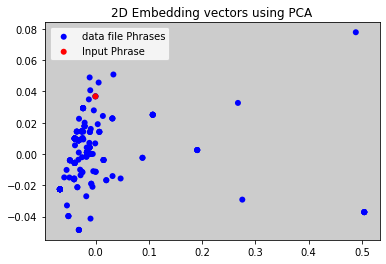

In [64]:

data_vector.append(vectorized_X) # For PCA
data_array = np.array(data_vector) # To numpy array of input + data vectors 50dim

pca = PCA(n_components = 2) 
# print(vectorized_X.shape)
X_transformed = pca.fit_transform(data_array)
print(X_transformed.shape)
print(X_transformed[0])

# Use matplotlib in notebook output
#%matplotlib inline

plotx = []
ploty = []

for i in range(len(X_transformed)):
    plotx.append(X_transformed[i][0])
    ploty.append(X_transformed[i][1])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="0.8")

data = ((plotx, ploty)), (X_transformed[0][0],X_transformed[0][1])
colors = ("blue", "red")
groups = ("data file Phrases", "Input Phrase")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, c=color, edgecolors='none', label=group)
plt.title('2D Embedding vectors plot using PCA')
plt.legend(loc=2)
plt.show()


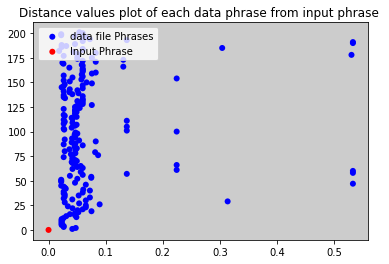

In [78]:
plotx = []
ploty = []

for i in range(len(distance_array)):
    plotx.append(distance_array[i])
    ploty.append(i + 1)

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="0.8")

data = ((plotx, ploty), (0,0))
colors = ("blue", "red")
groups = ("data file Phrases", "Input Phrase")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, c=color, edgecolors='none', label=group)
plt.title('Distance values plot of each data phrase from input phrase ')
# Red dot is at (0,0) as it is the distance of input phrase from itself.
plt.legend(loc=2)
plt.show()

## Summary
As we can see from the few algorithms we tried, its hard to see which algorithm performed better than other. Wihout domain knowledge, meaning without knowing whether semantic matter or not or how we define the good output and bad output. We can't compare outputs so it makes it hard to choose the best algorithm for choosing most appropriate obeservations from out data list.